Convolutional Neural Network

https://www.cs.toronto.edu/~kriz/cifar.html

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import BatchNormalization

#helper libraries
import numpy as np
import matplotlib.pyplot as plt

print (tf.__version__)

2.10.0


In [2]:
# download cifar 10
(train_images, train_labels), (test_images, test_labels) = datasets.cifar100.load_data()  # optionally work with cifar100

#normalize the pixel values
#train_images = train_images/ 255.0
#test_images = test_images/ 255.0

169001437/169001437 [==============================] - 51s 0us/step


In [4]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [3]:
train_images.shape  # 3 dimensions for color

(50000, 32, 32, 3)

In [20]:
train_images[5][0][0]

array([0.25882353, 0.20784314, 0.14117647])

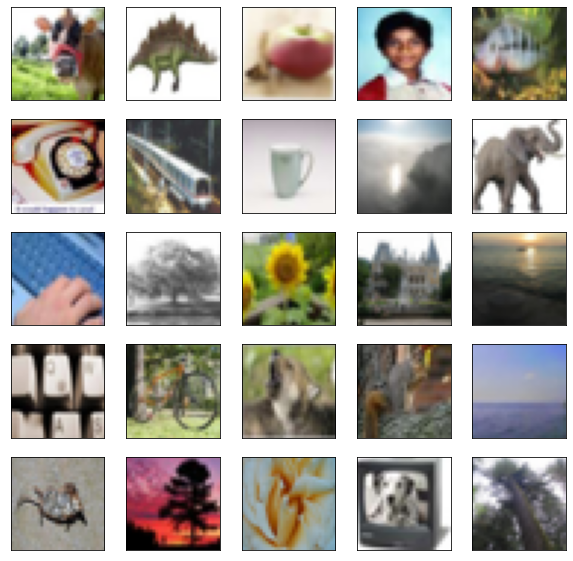

In [4]:
plt.figure(figsize = (10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    #plt.xlabel(class_names[train_labels[i][0]])
plt.show()

# low resolution

In [ ]:
# CNN -  can work with images 3 dimensions


In [5]:
# Defining architecture layers of CNN
model = tf.keras.Sequential()
# first layer, act as input
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPool2D((2,2)))

#in first round down sampling means losing some information, to compesate then increase the filter number  32-> 64
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))

# fully connected /  hidden layer
model.add(layers.Conv2D(64,(3,3), activation='relu'))

In [7]:
model.summary()
# (None, 30, 30, 32)    30x30  down sampling,  32: no. of outputs
# Param #, total  output features

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

To perform classification:  we will add one or more dense layers
Hidden or a dense layer of ANN:  accept input in single dimension===> flatten

In [13]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu')) # hidden layer,    creating a ANN...  fully connected.  requeries 1 dimension
model.add(layers.Dense(100)) # output layer,   in numbers not prob (need to attach softmax)

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [14]:
model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  # convert output into probabilities array to do cross entropy
                metrics=['accuracy']
            ) # loss function

In [15]:
model.fit(train_images, train_labels, epochs=10) # epochs number of rounds

Epoch 1/10
1563/1563 [==============================] - 103s 65ms/step - loss: 4.4569 - accuracy: 0.0281
Epoch 2/10
1563/1563 [==============================] - 108s 69ms/step - loss: 3.9880 - accuracy: 0.0833
Epoch 3/10
1563/1563 [==============================] - 129s 83ms/step - loss: 3.6116 - accuracy: 0.1447
Epoch 4/10
1563/1563 [==============================] - 109s 70ms/step - loss: 3.3660 - accuracy: 0.1873
Epoch 5/10
1563/1563 [==============================] - 100s 64ms/step - loss: 3.1978 - accuracy: 0.2153
Epoch 6/10
1563/1563 [==============================] - 85s 55ms/step - loss: 3.0589 - accuracy: 0.2412
Epoch 7/10
1563/1563 [==============================] - 69s 44ms/step - loss: 2.9538 - accuracy: 0.2608
Epoch 8/10
1563/1563 [==============================] - 63s 41ms/step - loss: 2.8373 - accuracy: 0.2809
Epoch 9/10
1563/1563 [==============================] - 68s 44ms/step - loss: 2.7496 - accuracy: 0.2981
Epoch 10/10
1563/1563 [==============================] - 59

In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc, test_loss)

313/313 [==============================] - 6s 17ms/step - loss: 3.0855 - accuracy: 0.2577
0.25769999623298645 3.0854663848876953


In [17]:
predictions = model.predict(test_images)
predictions[0]  # predictions are generate as numbers.  Probabilities are only used for cross entropy/loss calculation

313/313 [==============================] - 4s 12ms/step


array([ -8.825462  ,  -2.8665137 ,  -4.71986   ,  -1.3215759 ,
        -0.92105234,  -3.2835407 ,  -4.802022  ,  -2.2698283 ,
        -1.5245068 ,   0.66904294,  -0.93774104,  -3.0954013 ,
         1.2095846 ,  -2.1311758 ,  -3.8429492 ,  -2.676066  ,
        -3.0515554 ,  -2.0744777 ,   0.27943105,  -3.6826901 ,
        -3.224407  ,  -4.0052476 ,  -2.31687   ,  -0.19140962,
        -1.9569712 ,  -1.7790823 ,  -1.3433616 ,  -0.7389387 ,
        -4.243671  ,  -0.5105537 ,   1.243036  ,  -2.50857   ,
         0.14489287,  -2.009964  ,  -3.8325584 ,  -4.942052  ,
        -7.2329426 ,  -2.0972867 ,  -2.4014652 ,  -1.8802671 ,
         1.0294799 ,   0.81634873,  -5.51669   ,  -8.547945  ,
        -0.2463642 ,  -0.07036969,  -2.768334  ,  -2.9627316 ,
        -3.102293  ,   2.5492358 ,  -1.8021747 ,  -4.931209  ,
        -3.261154  , -14.783089  ,  -3.3223677 ,   0.86745226,
        -1.3543518 ,  -3.203704  ,  -2.4248245 ,   0.9380307 ,
        -1.3260714 ,  -2.5806065 ,  -8.524559  ,  -4.34

In [18]:
# extract the index position of the label
np.argmax(predictions[0]) # find the highest index

69

In [19]:
test_labels[69]

array([92])

In [23]:
predictions[0]



array([ -8.825462  ,  -2.8665137 ,  -4.71986   ,  -1.3215759 ,
        -0.92105234,  -3.2835407 ,  -4.802022  ,  -2.2698283 ,
        -1.5245068 ,   0.66904294,  -0.93774104,  -3.0954013 ,
         1.2095846 ,  -2.1311758 ,  -3.8429492 ,  -2.676066  ,
        -3.0515554 ,  -2.0744777 ,   0.27943105,  -3.6826901 ,
        -3.224407  ,  -4.0052476 ,  -2.31687   ,  -0.19140962,
        -1.9569712 ,  -1.7790823 ,  -1.3433616 ,  -0.7389387 ,
        -4.243671  ,  -0.5105537 ,   1.243036  ,  -2.50857   ,
         0.14489287,  -2.009964  ,  -3.8325584 ,  -4.942052  ,
        -7.2329426 ,  -2.0972867 ,  -2.4014652 ,  -1.8802671 ,
         1.0294799 ,   0.81634873,  -5.51669   ,  -8.547945  ,
        -0.2463642 ,  -0.07036969,  -2.768334  ,  -2.9627316 ,
        -3.102293  ,   2.5492358 ,  -1.8021747 ,  -4.931209  ,
        -3.261154  , -14.783089  ,  -3.3223677 ,   0.86745226,
        -1.3543518 ,  -3.203704  ,  -2.4248245 ,   0.9380307 ,
        -1.3260714 ,  -2.5806065 ,  -8.524559  ,  -4.34